<a href="https://colab.research.google.com/github/siriwatsc-debug/ProjectDADS5001/blob/main/DADS5001_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install the required packages for map
!pip install cartopy folium
!pip install openpyxl
!pip install Pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 48.5 MB/s eta 0:00:00


In [143]:
# Subject : DADS5001 - Tools and Programing
# Project : Pandas/Numpy
# Topic : EStudy the factors to occur the eartquake
# Team members : Siriwat/Sahaphum/Kridsada

# Analysis for insight and Story Telling
#: Global --> Local (Thailand) --> Risk Area --> Impact/Damage

# Questions
# 1.แผ่นดินไหวเกิดขึ้นบ่อยที่สุดในช่วงปี/เดือน ?                                  DROP
# 2.จังหวัดหรือภูมิภาคใดของไทยที่มีแผ่นดินไหวเกิดขึ้นบ่อยที่สุด?
#     By Province, Area : North
#     By Depth / Phase
# 3.ค่าขนาดแผ่นดินไหว (Magnitude) เฉลีย่ในแต่ละภูมิภาคเป็นอย่างไร? --> Should be Max
# 4.ข้อมูลแผ่นดินไหวของไทยเมื่อเทียบกับประเทศในภูมิภาคเอเชียตะวันออกเฉียงใต้เป็นอย่างไร?
# 5.Disaster impact of EQ in thailand เป็นอย่างไร

# Add
# : Risk Area (Top 5 province) and Non-Risk Area (Top 5 province), Mag occured > 0 and > 5
# : Depth and Phase related to risk area ? High : Depth / Phase , High Risk ?
# : Station and Max count of --> From Paper : Sensor Orientation of the TMD Seismic Network (Thailand) from P-Wave Particle Motions (2009-2022)
#     https://earthquake.tmd.go.th/documents/file/Supplementary_Info_PatinyaPornsopin2022.pdf

# Next plan : Prediction but Data is huge and require Geo Knowledge on EQ parameters.

import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display, Markdown, Latex, HTML, IFrame, JSON, Code, Image, YouTubeVideo, clear_output

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from PIL import Image
from google.colab import drive

from pathlib import WindowsPath
import matplotlib.patches as patches

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [144]:
# Load data
drive.mount('/content/drive')

#df_eq = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA_Earthquake_Draft1.xlsx') --> Old data
df_eq = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ProjectPandas/DATA_Earthquake_Draft1_Cleaned.xlsx')

df_pl = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ActiveFault-Plates.xlsx', sheet_name="73 sensors EQ")
df_dis = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ProjectPandas/disaster_extracted.xlsx')
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/all-event.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


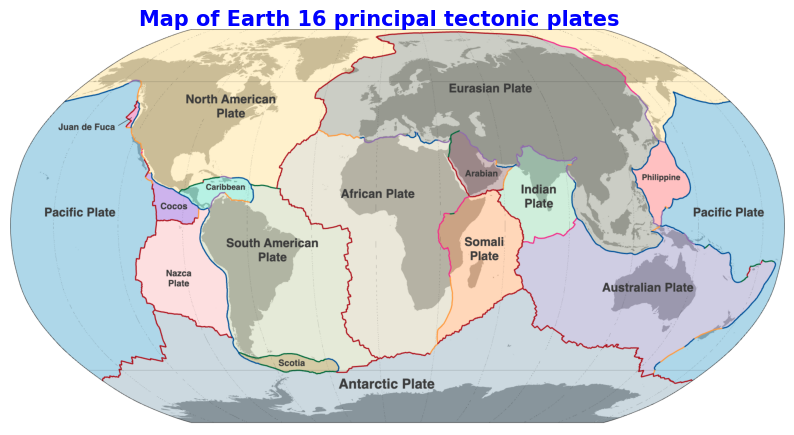

# แผนที่ : แผ่นเปลือกโลกหลัก 16 แผ่น 
(Map of Earth's 16 principal tectonic plates)
## <font color=Green>ที่มา : wiki pedia (https://en.wikipedia.org/wiki/List_of_tectonic_plates)</font>


In [145]:
# Add image 16 principal plates in the world

pic = '/content/drive/MyDrive/Colab Notebooks/ProjectPandas/Wiki_Earth_plates.png'
img = Image.open(pic)
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.text(320, -10, 'Map of Earth 16 principal tectonic plates', fontsize = 15, fontweight='bold', color='blue')
plt.axis('off')
plt.show()

s = """# แผนที่ : แผ่นเปลือกโลกหลัก 16 แผ่น
(Map of Earth's 16 principal tectonic plates)
## <font color=Green>ที่มา : wiki pedia (https://en.wikipedia.org/wiki/List_of_tectonic_plates)</font>
"""

display( Markdown(s) )

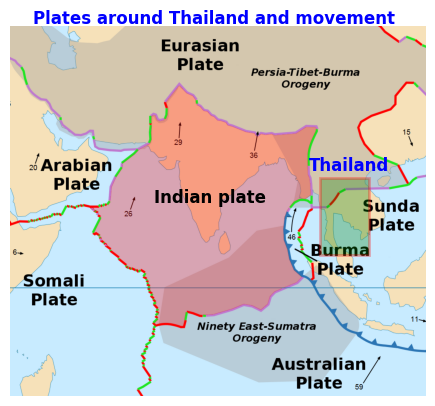

# แผ่นเปลือกโลกบริเวณประเทศไทย และ ข้อมูลการเคลื่อนตัว 
## <font color=Green>ที่มา : wiki pedia (https://en.wikipedia.org/wiki/Indian_plate)</font>
### ขนาดพื้นที่ และ การเคลื่อนตัว 
- Approximate area	11,900,000 km2 (4,600,000 sq mi)
- Movement:	North-east
- Speed1	26–36 mm/a (1.0–1.4 in/year)



In [146]:
# Scope to Thailand

pic = '/content/drive/MyDrive/Colab Notebooks/ProjectPandas/IndianPlate.png'
img = Image.open(pic)

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')

# highlight rectangle to Thailand
x = 760
y = 370
width = 120
height = 190
highlight = patches.Rectangle( (x,y), width, height, linewidth=2, edgecolor='red', facecolor='green', alpha=0.3)
ax.add_patch(highlight)
ax.text(x+70, y-30, 'Thailand', fontsize = 12, fontweight='bold', color='blue', ha='center', va='center')

# Add Indian plate
ax.text(x-270, y+50, 'Indian plate', fontsize = 12, fontweight='bold', color='black', ha='center', va='center')
ax.text(500, -20, 'Plates around Thailand and movement', fontsize = 12, fontweight='bold', color='blue', ha='center', va='center')
plt.show()


# Add explanation for Indian plate movement
s = """# แผ่นเปลือกโลกบริเวณประเทศไทย และ ข้อมูลการเคลื่อนตัว
## <font color=Green>ที่มา : wiki pedia (https://en.wikipedia.org/wiki/Indian_plate)</font>
### ขนาดพื้นที่ และ การเคลื่อนตัว
- Approximate area	11,900,000 km2 (4,600,000 sq mi)
- Movement:	North-east
- Speed1	26–36 mm/a (1.0–1.4 in/year)

"""
display( Markdown(s) )


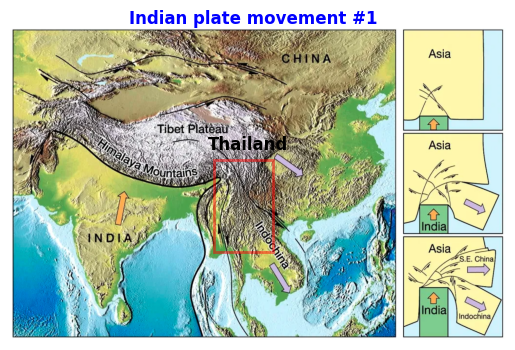

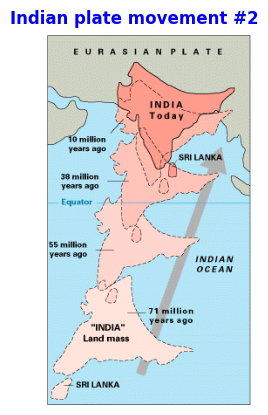

# แผ่นเปลือกโลกที่เคลื่อนตัวใกล้บริเวณประเทศไทย 
## <font color=Green>ที่มา : wiki pedia (https://www.mitrearth.org/4-232-earthquake-thailand)</font>
### ขนาดพื้นที่ และ การเคลื่อนตัว 
- Approximate area	11,900,000 km2 (4,600,000 sq mi)
- Movement:	North-east
- Speed1	26–36 mm/a (1.0–1.4 in/year)



In [171]:
# Add Plate movement : Eurasia and Indian

pic = '/content/drive/MyDrive/Colab Notebooks/ProjectPandas/Thai_Fault_EU_Indian_plate.png'
img = Image.open(pic)

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')
ax.text(500, -20, 'Indian plate movement #1', fontsize = 12, fontweight='bold', color='blue', ha='center', va='center')

# highlight rectangle to Thailand
x = 420
y = 270
width = 120
height = 190
highlight = patches.Rectangle( (x,y), width, height, linewidth=2, edgecolor='red', facecolor='none', alpha=0.5)
ax.add_patch(highlight)
ax.text(x+70, y-30, 'Thailand', fontsize = 12, fontweight='bold',  ha='center', va='center')

pic = '/content/drive/MyDrive/Colab Notebooks/ProjectPandas/Himalaya.gif'
img = Image.open(pic)

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis('off')

# highlight rectangle to Thailand
x = 760
y = 370
width = 120
height = 190

# Add Indian plate movement
ax.text(100, -20, 'Indian plate movement #2', fontsize = 12, fontweight='bold', color='blue', ha='center', va='center')
plt.show()

# Add explanation for Indian plate movement
s = """# แผ่นเปลือกโลกที่เคลื่อนตัวใกล้บริเวณประเทศไทย
## <font color=Green>ที่มา : wiki pedia (https://www.mitrearth.org/4-232-earthquake-thailand)</font>
### ขนาดพื้นที่ และ การเคลื่อนตัว
- Approximate area	11,900,000 km2 (4,600,000 sq mi)
- Movement:	North-east
- Speed1	26–36 mm/a (1.0–1.4 in/year)

"""
display( Markdown(s) )


In [148]:
# Check data frame on each datasets
df.head()               # Original data --> Will terminate
df_pl.head()            # Active plates data
df_dis.head()           # Disaster and Impact date
df_eq.head()            # Earth Quake data

No. REF. ID        DATE-TIME UTC  DATE_THAI       YEAR  MONTH  DAY  \
0    1  TM0001  2007-01-04 08:38:00 2007-01-04 2007-01-01      1    4   
1    2  TM0002  2007-01-06 02:23:00 2007-01-06 2007-01-01      1    6   
2    3  TM0003  2007-04-22 06:18:00 2007-04-22 2007-01-01      4   22   
3    4  TM0004  2007-04-23 14:18:00 2007-04-23 2007-01-01      4   23   
4    5  TM0005  2007-05-16 10:04:00 2007-05-16 2007-01-01      5   16   

  TIME THAI  LAT.   LONG.  ...  DEPTH. PHASE.           REGION_NANE_THAI  \
0  15:38:00  18.9   99.00  ...     0.0      0       อ.แม่ริม จ.เชียงใหม่   
1  09:23:00  18.9   99.00  ...     0.0      0       อ.แม่ริม จ.เชียงใหม่   
2  13:18:00  19.4   99.36  ...     0.0      0  อ.เวียงป่าเป้า จ.เชียงราย   
3  21:18:00  19.6   99.20  ...     0.0      0        อ.พร้าว จ.เชียงใหม่   
4  17:04:00  21.0  100.50  ...     0.0      0             พรมแดนลาว-พม่า   

   SUB_DISTINCT      DISTINCT    PROVINCE      COUNTRY    REGION  \
0           NaN       Mae Rim  Chiang Mai     Thailand  Northern   
1           NaN       Mae Rim  Chiang Mai     Thailand  Northern   
2           NaN  Wiang Pa Pao  Chiang Rai     Thailand  Northern   
3           NaN         Phrao  Chiang Mai     Thailand  Northern   
4           NaN           NaN         NaN  Myanmar-Lao       NaN   

  REGION_NAME_ENG                                             DETAIL  
0             NaN                                                NaN  
1             NaN                                                NaN  
2             NaN                                                NaN  
3             NaN                                                NaN  
4             NaN  ห่างจาก จ.เชียงราย 95 กม. รู้สึกสั่นไหวที่หลาย...  

[5 rows x 23 columns]

In [149]:
# Equak Data : Lat,Long,Mag,Dep,Phase, Date, Time, Area (District,Province, Country)
# Original data
df_eq.info()

# Rename existing columns ID : Data Frame EarthQuake
df_eq = df_eq.rename(columns={'No.':'no', 'REF. ID':'refid', 'DATE-TIME UTC':'dtutc','DATE_THAI':'date','YEAR':'year', 'MONTH' : 'month', 'DAY' : 'day',
                              'TIME THAI':'time', 'LAT.':'lat', 'LONG.':'long','MAG.':'mag',
                              'DEPTH.':'depth', 'PHASE.':'phase', 'REGION_NANE_THAI':'region_th','SUB_DISTINCT':'subdistrict', 'DISTINCT':'district',
                              'PROVINCE':'province', 'COUNTRY':'country', 'REGION':'region'}) # default: inplace=False

df_eq.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   No.               14986 non-null  int64         
 1   REF. ID           14986 non-null  object        
 2   DATE-TIME UTC     14986 non-null  object        
 3   DATE_THAI         14986 non-null  datetime64[ns]
 4   YEAR              14986 non-null  datetime64[ns]
 5   MONTH             14986 non-null  int64         
 6   DAY               14986 non-null  int64         
 7   TIME THAI         14986 non-null  object        
 8   LAT.              14986 non-null  float64       
 9   LONG.             14986 non-null  float64       
 10  MAG.              14986 non-null  float64       
 11  MAG_RANGE         14986 non-null  object        
 12  MAG_RANGE_DES     14986 non-null  object        
 13  DEPTH.            14986 non-null  float64       
 14  PHASE.            1498

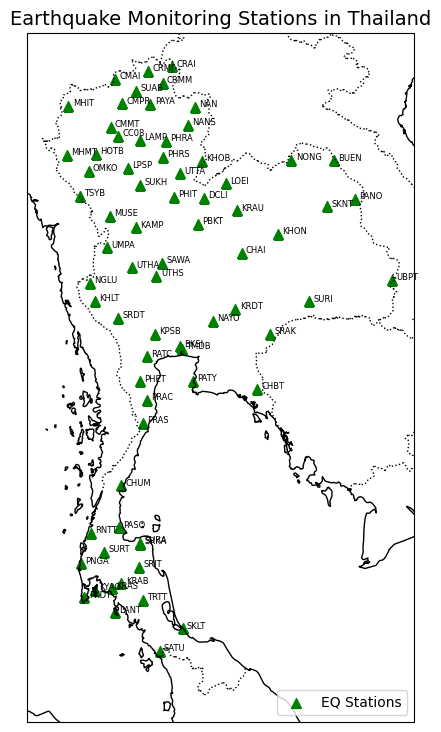

# สถานีตรวจวัดแผ่นดินไหว สถานีหลัก 73 แห่ง ครอบคลุมพื้นที่ในประเทศไทย 
(Sensor Orientation of the TMD Seismic Network)
## <font color=Green>ที่มา : กองเฝ้าระวังแผ่นดินไหว (https://earthquake.tmd.go.th/stations.html) </font>



In [150]:
# Display EQ station in Thailand - DONE

import pandas as pd
import matplotlib.pyplot as plt

df = df_pl

# Display
#print(df.head())

# Map
fig = plt.figure(figsize=(5,9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([97, 106, 5, 21])  # Thai location

# Add line
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Plot EQ stations by lat and longplot จุด (ใช้ lat, long)
plt.scatter(df['Long'], df['Lat'],
            c='Green', marker='^', s=50, label="EQ Stations",
            transform=ccrs.PlateCarree())

# Add station code
for i, row in df.iterrows():
    plt.text(row['Long']+0.1, row['Lat']+0.0, row['Station code'],
             fontsize=6, transform=ccrs.PlateCarree())

# Legend + Title
plt.legend(loc="lower right")
plt.title("Earthquake Monitoring Stations in Thailand", fontsize=14)

plt.show()

s = """# สถานีตรวจวัดแผ่นดินไหว สถานีหลัก 73 แห่ง ครอบคลุมพื้นที่ในประเทศไทย
(Sensor Orientation of the TMD Seismic Network)
## <font color=Green>ที่มา : กองเฝ้าระวังแผ่นดินไหว (https://earthquake.tmd.go.th/stations.html) </font>

"""

display( Markdown(s) )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DisNo             679 non-null    object 
 1   classKey          679 non-null    object 
 2   distype           679 non-null    object 
 3   dissubtype        679 non-null    object 
 4   country           679 non-null    object 
 5   subreg            679 non-null    object 
 6   Region            679 non-null    object 
 7   Location          674 non-null    object 
 8   assotype          155 non-null    object 
 9   mag               677 non-null    float64
 10  lat               647 non-null    float64
 11  long              647 non-null    float64
 12  styear            679 non-null    int64  
 13  stmonth           679 non-null    int64  
 14  stday             679 non-null    int64  
 15  endyear           679 non-null    int64  
 16  endmonth          679 non-null    int64  
 1

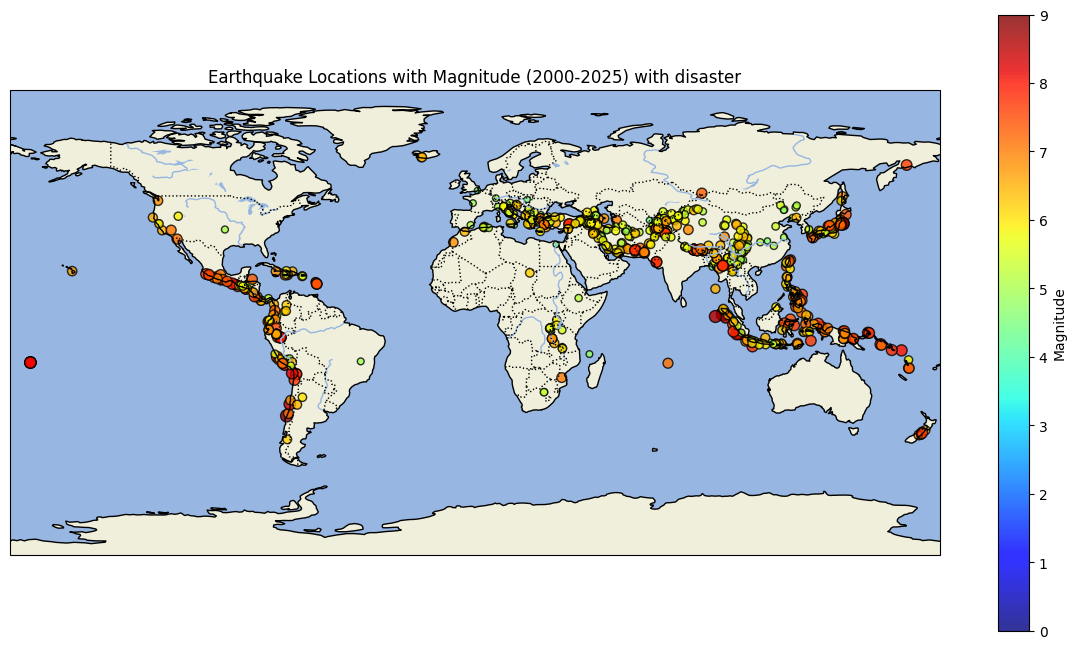

# Global : Earthquake with disasters  
## <font color=Green>ที่มา :  https://www.emdat.be </font>



In [151]:
# Overall Earth Quake Global with Disaster

# Set Data Frame : Disaster
df = df_dis
#print(df.columns)

# Rename existing columns ID
df2 = df_dis.rename(columns={'DisNo.':'DisNo', 'Classification Key':'classKey',
                             'Disaster Type':'distype','Disaster Subtype':'dissubtype',
                             'Country':'country', 'Subregion':'subreg', 'Associated Types':'assotype',
                             'Magnitude':'mag', 'Latitude':'lat', 'Longitude':'long',  'Start Year':'styear',
                             'Start Month':'stmonth',
                             'Start Day':'stday', 'End Year':'endyear','End Month':'endmonth', 'End Day':'endday',
                             'Total Deaths':'totaldeaths', 'No. Injured':'injure','No. Affected':'affected',
                             'No. Homeless':'homeless', 'Total Affected':'totalaffected',
                             'Reconstruction Costs (\'000 US$)':'recon_cost',
                             'Reconstruction Costs, Adjusted (\'000 US$)':'recon_cost_adj',
                             'Insured Damage (\'000 US$)':'insuredamage',
                             'Insured Damage, Adjusted (\'000 US$)':'insuredamage_adj',
                             'Total Damage (\'000 US$)':'totaldamage',
                             'Total Damage, Adjusted (\'000 US$)' : 'totaldamage_adj',
                             'Entry Date':'entrydate', 'Last Update':'lastupdate'}) # default: inplace=False

df2.info()

# column: 'Latitude', 'Longitude', 'Magnitude'
lat = df2["lat"]
lon = df2["long"]
mag = df2["mag"]

# Plot map
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add borders
#ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Set Frame to plot for Global
ax.set_extent([-180, 180, -180, 180], crs=ccrs.PlateCarree())

# plot EQ location by lat and long
sc = ax.scatter(
    lon, lat,
    c=mag, s=mag**2,   # ขนาดจุด ∝ magnitude
    cmap="jet", alpha=0.8,
    vmin=0, vmax=9.0,
    edgecolor="k", transform=ccrs.PlateCarree()
)

# colorbar
plt.colorbar(sc, ax=ax, label="Magnitude")

plt.title("Earthquake Locations with Magnitude (2000-2025) with disaster")
plt.show()


s = """# Global : Earthquake with disasters
## <font color=Green>ที่มา :  https://www.emdat.be </font>

"""

display( Markdown(s) )

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


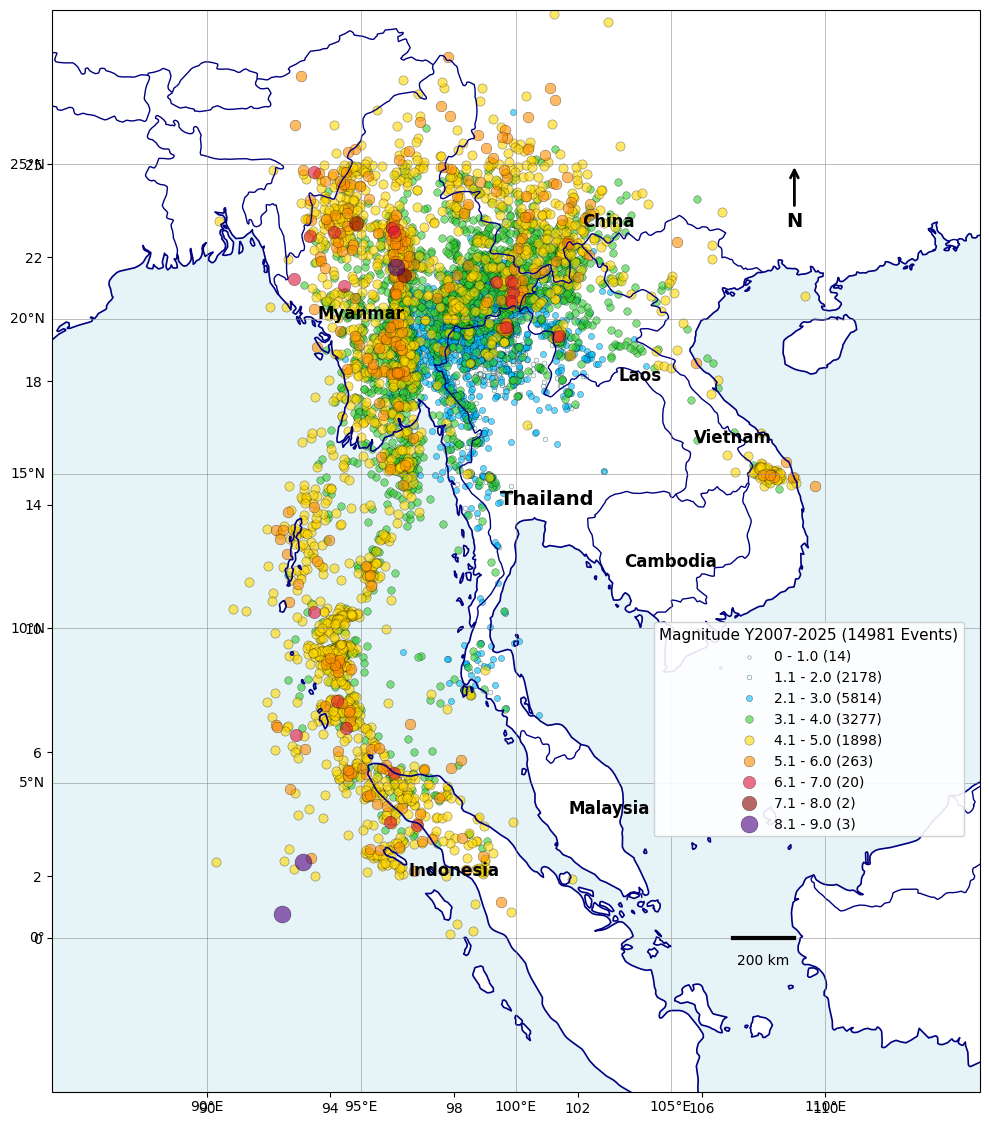

# Local : Earthquake in Thailand and nearby
## <font color=Green>ที่มา : กองเฝ้าระวังแผ่นดินไหว (https://earthquake.tmd.go.th)</font>



In [152]:
# Plot : Overall Magnitude by range VS Areas around Thailand

# Load data EQ
df = df_eq.copy()

# Pick : lat, long and magnitude
lat_all = df["lat"].values
lon_all = df["long"].values
mag_all = df["mag"].values

# Frame position in Map (SEA region)
mask = (lat_all >= 0) & (lat_all <= 30) & (lon_all >= 90) & (lon_all <= 115)
lat_filtered = lat_all[mask]
lon_filtered = lon_all[mask]
mag_filtered = mag_all[mask]

# Create Map
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([85, 115, -5, 30], crs=ccrs.PlateCarree())

# Add Geo features
ax.add_feature(cfeature.COASTLINE, linewidth=1.2, color='navy')
ax.add_feature(cfeature.BORDERS, linewidth=1.0, color='navy')
ax.add_feature(cfeature.LAND, color='white', alpha=0.8)
ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.3)

# Create colormap and size mapping
colors_map = {
    (0, 1.0):   ('white', 3),           # ขาว
    (1.1, 2.0): ('lightcyan', 6),       # ฟ้าอ่อนมาก
    (2.1, 3.0): ('deepskyblue', 10),    # ฟ้า
    (3.1, 4.0): ('limegreen', 15),      # เขียว
    (4.1, 5.0): ('gold', 22),           # ทอง
    (5.1, 6.0): ('darkorange', 30),     # ส้มเข้ม
    (6.1, 7.0): ('crimson', 40),        # แดงเข้ม
    (7.1, 8.0): ('darkred', 55),        # แดงเข้มมาก
    (8.1, 9.0): ('indigo', 75)          # น้ำเงินเข้ม
}

# Put EQ Mag in each lat and long
for (min_mag, max_mag), (color, size) in colors_map.items():
    mask_mag = (mag_filtered >= min_mag) & (mag_filtered < max_mag)
    if np.any(mask_mag):
        count = np.sum(mask_mag)
        ax.scatter(lon_filtered[mask_mag], lat_filtered[mask_mag],
                   c=color, s=size*2, alpha=0.6,
                   edgecolor='black', linewidth=0.3,
                   transform=ccrs.PlateCarree(),
                   label=f'{min_mag} - {max_mag} ({count})')

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_xticks([90, 94, 98, 102, 106, 110], crs=ccrs.PlateCarree())
ax.set_yticks([0, 2, 6, 10, 14, 18, 22, 25], crs=ccrs.PlateCarree())

# Label Country
ax.text(95, 20, 'Myanmar', fontsize=12, ha='center', fontweight='bold')
ax.text(103, 23, 'China', fontsize=12, ha='center', fontweight='bold')
ax.text(104, 18, 'Laos', fontsize=12, ha='center', fontweight='bold')
ax.text(101, 14, 'Thailand', fontsize=14, ha='center', fontweight='bold')
ax.text(107, 16, 'Vietnam', fontsize=12, ha='center', fontweight='bold')
ax.text(105, 12, 'Cambodia', fontsize=12, ha='center', fontweight='bold')
ax.text(103, 4, 'Malaysia', fontsize=12, ha='center', fontweight='bold')
ax.text(98, 2, 'Indonesia', fontsize=12, ha='center', fontweight='bold')

# Legend
legend = ax.legend(title=f'Magnitude Y2007-2025 ({len(mag_filtered)} Events)',
                   loc='lower right', fontsize=10, title_fontsize=11,
                   bbox_to_anchor=(0.99, 0.23))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Scale bar
scale_lon = 107
scale_lat = 0
ax.plot([scale_lon, scale_lon+2], [scale_lat, scale_lat], 'k-', lw=3,
        transform=ccrs.PlateCarree())
ax.text(scale_lon+1, scale_lat-0.5, '200 km',
        ha='center', va='top', fontsize=10,
        transform=ccrs.PlateCarree())

# North arrow
ax.annotate('N', xy=(109, 25), xytext=(109, 23),
            arrowprops=dict(arrowstyle='->', lw=2),
            fontsize=14, ha='center', fontweight='bold',
            transform=ccrs.PlateCarree())

plt.tight_layout()
plt.show()

s = """# Local : Earthquake in Thailand and nearby
## <font color=Green>ที่มา : กองเฝ้าระวังแผ่นดินไหว (https://earthquake.tmd.go.th)</font>

"""

display( Markdown(s) )

Index(['no', 'refid', 'dtutc', 'date', 'year', 'month', 'day', 'time', 'lat',
       'long', 'mag', 'MAG_RANGE', 'MAG_RANGE_DES', 'depth', 'phase',
       'region_th', 'subdistrict', 'district', 'province', 'country', 'region',
       'REGION_NAME_ENG', 'DETAIL'],
      dtype='object')


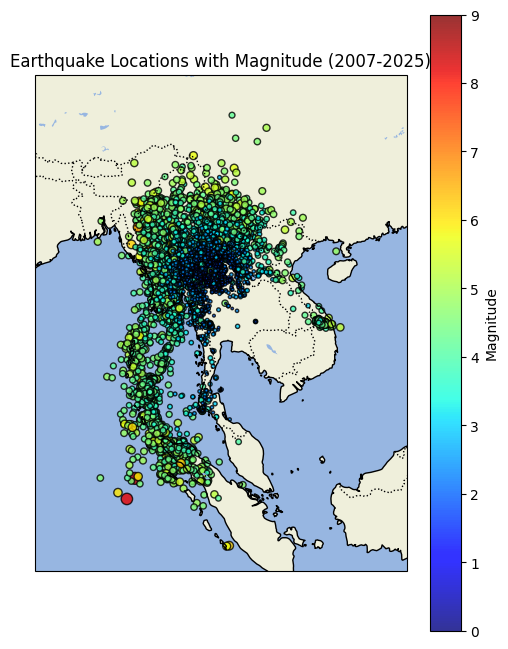

# Local : Earthquake in Thailand and nearby
## <font color=Green>ที่มา : กองเฝ้าระวังแผ่นดินไหว (https://earthquake.tmd.go.th)</font>



In [103]:
# Overall Earth Quake in South East Asia / South China

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set Data Frame : Earth Quake
df = df_eq.copy()
print(df.columns)

# column: 'Latitude', 'Longitude', 'Magnitude'
lat = df["lat"]
lon = df["long"]
mag = df["mag"]

# Plot map
fig = plt.figure(figsize=(6, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add borders
#ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Set Frame to plot
#ax.set_extent([90, 110, 0, 30], crs=ccrs.PlateCarree())

ax.set_extent([85, 115, -5, 35], crs=ccrs.PlateCarree())

# plot EQ location by lat and long
sc = ax.scatter(
    lon, lat,
    c=mag, s=mag**2,   # ขนาดจุด ∝ magnitude
    cmap="jet", alpha=0.8,
    vmin=0, vmax=9.0,
    edgecolor="k", transform=ccrs.PlateCarree()
)

# colorbar
plt.colorbar(sc, ax=ax, label="Magnitude")

plt.title("Earthquake Locations with Magnitude (2007-2025)")
plt.show()

s = """# Local : Earthquake in Thailand and nearby
## <font color=Green>ที่มา : กองเฝ้าระวังแผ่นดินไหว (https://earthquake.tmd.go.th)</font>

"""

display( Markdown(s) )




/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


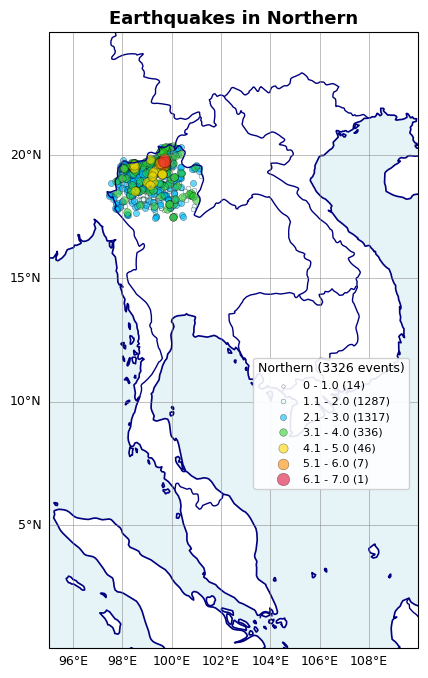

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


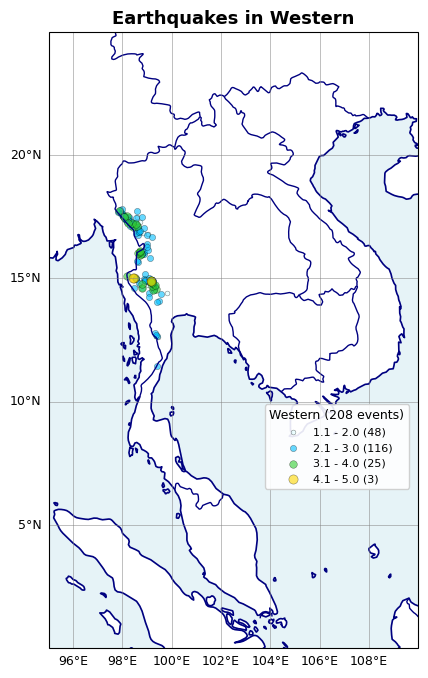

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


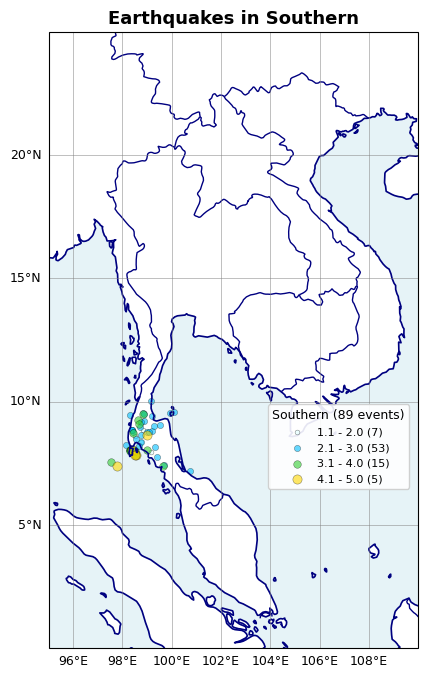

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


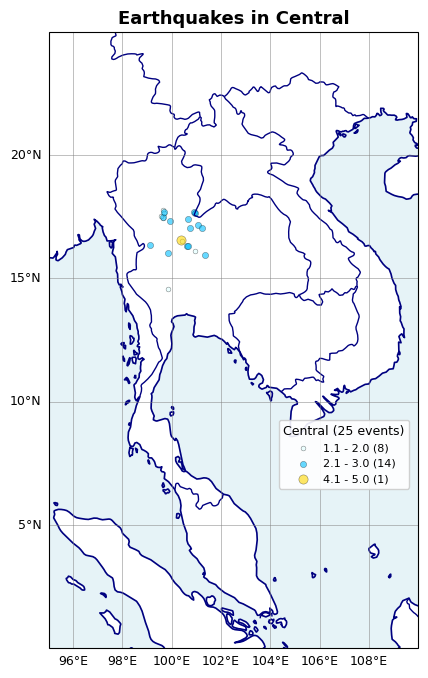

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


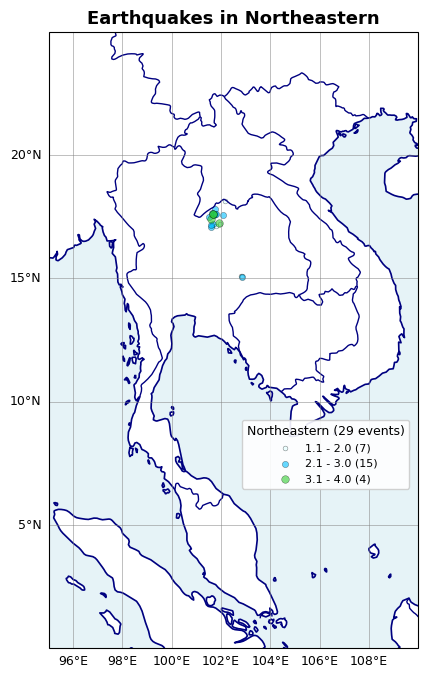

In [123]:
# Plot by Regions : North, East, West, South, Central - DONE

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np


df = df_eq.copy()
# === Function plot per region ===
def plot_region(region_name, df_region):
    lat_all = df_region["lat"].values
    lon_all = df_region["long"].values
    mag_all = df_region["mag"].values

    # Filter พื้นที่ SEA
    mask = (lat_all >= 0) & (lat_all <= 30) & (lon_all >= 90) & (lon_all <= 115)
    lat_filtered = lat_all[mask]
    lon_filtered = lon_all[mask]
    mag_filtered = mag_all[mask]

    # Create Map
    #fig = plt.figure(figsize=(8, 10))
    fig = plt.figure(figsize=(6, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([95, 110, 0, 25], crs=ccrs.PlateCarree())

    # Add Geo features
    ax.add_feature(cfeature.COASTLINE, linewidth=1.2, color='navy')
    ax.add_feature(cfeature.BORDERS, linewidth=1.0, color='navy')
    ax.add_feature(cfeature.LAND, color='white', alpha=0.8)
    ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.3)

    # Colormap magnitude
    colors_map = {
        (0, 1.0):   ('white', 3),
        (1.1, 2.0): ('lightcyan', 6),
        (2.1, 3.0): ('deepskyblue', 10),
        (3.1, 4.0): ('limegreen', 15),
        (4.1, 5.0): ('gold', 22),
        (5.1, 6.0): ('darkorange', 30),
        (6.1, 7.0): ('crimson', 40),
        (7.1, 8.0): ('darkred', 55),
        (8.1, 9.0): ('indigo', 75)
    }

    # Scatter points
    for (min_mag, max_mag), (color, size) in colors_map.items():
        mask_mag = (mag_filtered >= min_mag) & (mag_filtered < max_mag)
        if np.any(mask_mag):
            count = np.sum(mask_mag)
            ax.scatter(lon_filtered[mask_mag], lat_filtered[mask_mag],
                       c=color, s=size*2, alpha=0.6,
                       edgecolor='black', linewidth=0.3,
                       transform=ccrs.PlateCarree(),
                       label=f'{min_mag} - {max_mag} ({count})')

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    # Legend
    legend = ax.legend(title=f'{region_name} ({len(mag_filtered)} events)',
                       loc='lower right', fontsize=8, title_fontsize=9,
                       bbox_to_anchor=(0.99, 0.25))
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_alpha(0.9)

    ax.set_title(f"Earthquakes in {region_name}", fontsize=13, fontweight='bold')
    plt.show()

# === Drop NaN in Region ===
df_eq = df_eq.dropna(subset=["region"])


# === Loop plot per region ===
regions = df_eq["region"].unique()

for reg in regions:
    df_region = df_eq[df_eq["region"] == reg]
    plot_region(reg, df_region)


/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


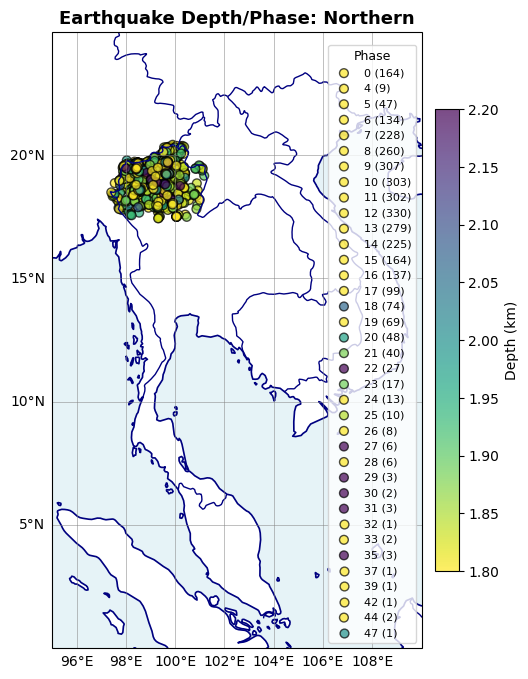

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


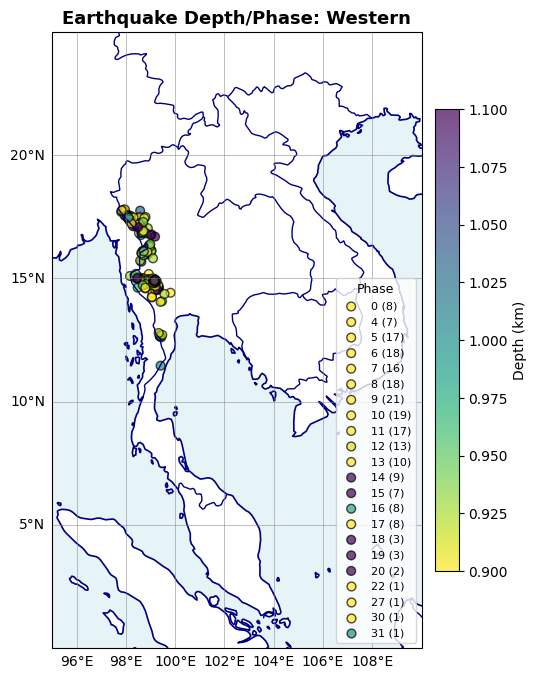

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


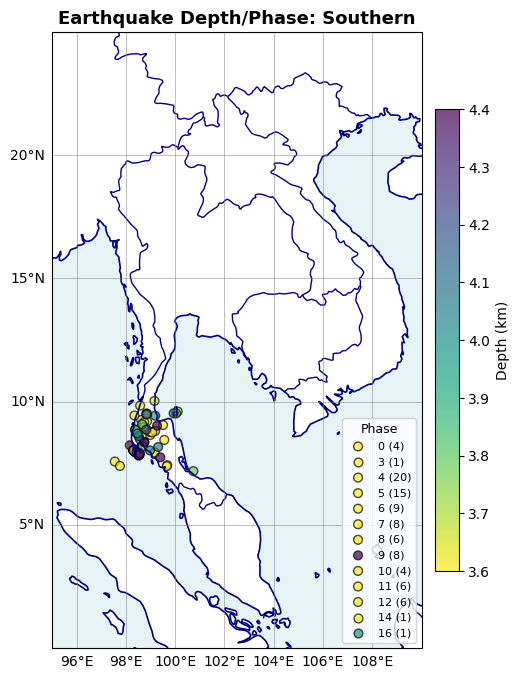

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


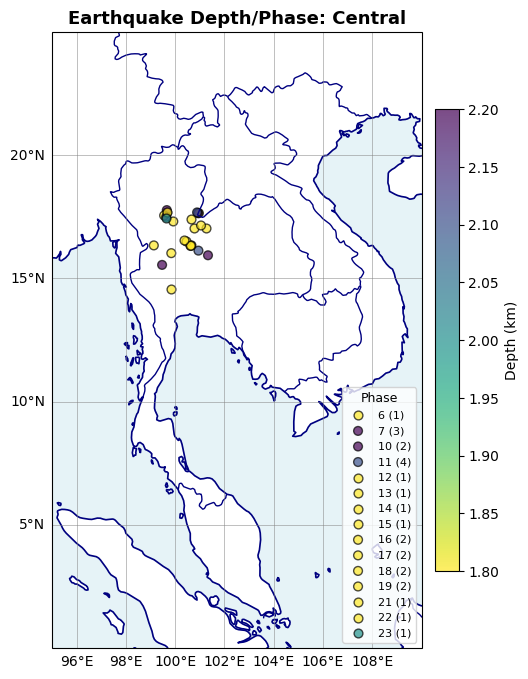

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


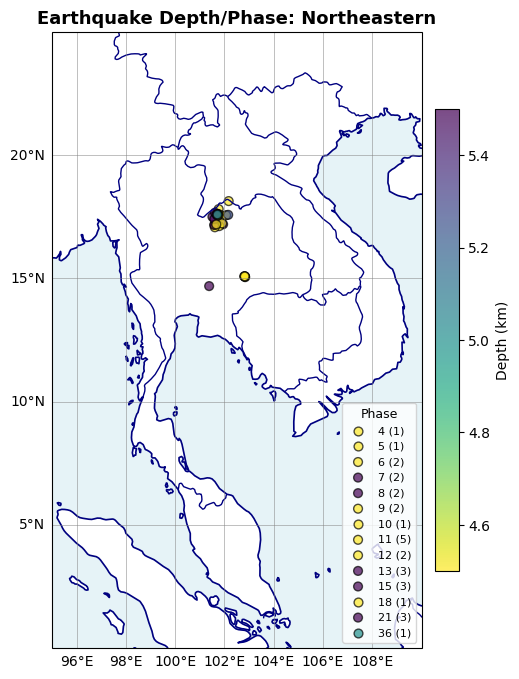

In [136]:
# Plot Depth and Phase by Regions - Need to check bubble sizes of depth and phase

df = df_eq.copy()

def plot_region_depth_phase(region_name, df_region):
    lat_all = df_region["lat"].values
    lon_all = df_region["long"].values
    depth_all = df_region["depth"].values       # ความลึก
    phase_all = df_region["phase"].values       # Phase

    mask = (lat_all >= 0) & (lat_all <= 30) & (lon_all >= 90) & (lon_all <= 115)
    lat_filtered = lat_all[mask]
    lon_filtered = lon_all[mask]
    depth_filtered = depth_all[mask]
    phase_filtered = phase_all[mask]

    fig = plt.figure(figsize=(6, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([95, 110, 0, 25], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.COASTLINE, linewidth=1.2, color='navy')
    ax.add_feature(cfeature.BORDERS, linewidth=1.0, color='navy')
    ax.add_feature(cfeature.LAND, color='white', alpha=0.8)
    ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.3)

    # ตัวอย่าง phase marker map
    phase_marker = {"P": "o", "S": "^", "L": "s"}  # กำหนดตาม phase มี o, ^, s

    unique_phases = np.unique(phase_filtered)
    for phase in unique_phases:
        phase_mask = (phase_filtered == phase)
        if np.any(phase_mask):
            scatter = ax.scatter(
                lon_filtered[phase_mask],
                lat_filtered[phase_mask],
                c=depth_filtered[phase_mask],   # ให้ colormap แสดงความลึก
                cmap='viridis_r',               # colormap สำหรับ depth
                s=40,
                alpha=0.7,
                marker=phase_marker.get(phase, 'o'),
                edgecolor='black',
                transform=ccrs.PlateCarree(),
                label=f"{phase} ({np.sum(phase_mask)})"
            )

    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7)
    gl.top_labels = False; gl.right_labels = False
    ax.set_title(f"Earthquake Depth/Phase: {region_name}", fontsize=13, fontweight='bold')

    # เพิ่ม colorbar สำหรับ depth
    cb = plt.colorbar(scatter, ax=ax, orientation='vertical', label='Depth (km)', shrink=0.75, pad=0.03)
    ax.legend(title="Phase", loc='lower right', fontsize=8, title_fontsize=9)
    plt.show()


# === Drop NaN in Region ===
df_eq = df_eq.dropna(subset=["region"])


# === Loop plot per region ===
regions = df_eq["region"].unique()

for reg in regions:
    df_region = df_eq[df_eq["region"] == reg]
    #plot_region(reg, df_region)
    plot_region_depth_phase(reg, df_region)


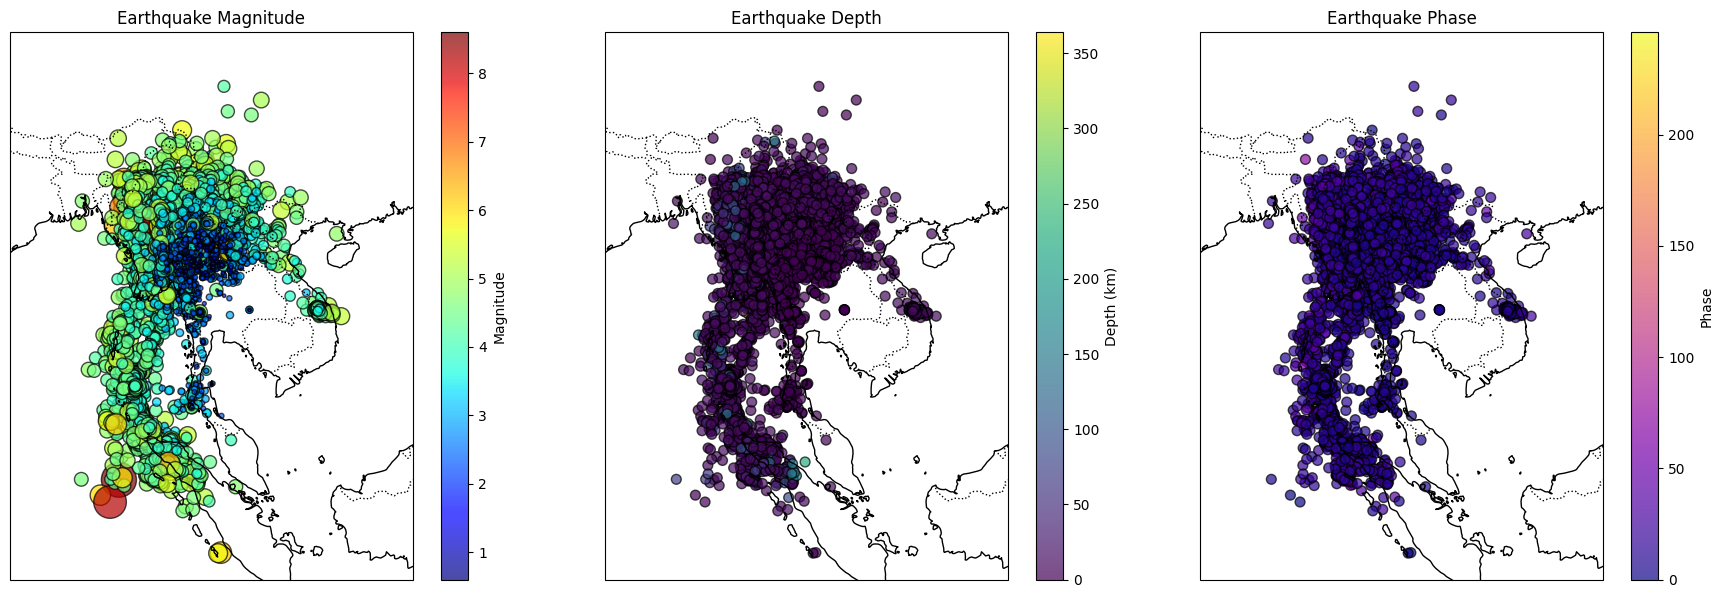

In [104]:

# Plot Mag, Depth and Phase


# สมมติว่ามีคอลัมน์: Latitude, Longitude, Magnitude, Depth, Phase
lat = df["lat"]
lon = df["long"]
mag = df["mag"]
depth = df["depth"]
phase = df["phase"]


# กำหนดพื้นที่แผนที่ (ประเทศไทยและรอบๆ)
extent = [85, 115, -5, 35] #[90, 110, 5, 25]

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6),
                         subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Depth and Phase
# ===== แผนที่ Magnitude =====
axes[0].add_feature(cfeature.COASTLINE)
axes[0].add_feature(cfeature.BORDERS, linestyle=":")
axes[0].set_extent(extent)
sc1 = axes[0].scatter(lon, lat, c=mag, s=mag**3,
                      cmap="jet", alpha=0.7, edgecolor="k",transform=ccrs.PlateCarree())
plt.colorbar(sc1, ax=axes[0], orientation="vertical", label="Magnitude")
axes[0].set_title("Earthquake Magnitude")

# ===== แผนที่ Depth =====
axes[1].add_feature(cfeature.COASTLINE)
axes[1].add_feature(cfeature.BORDERS, linestyle=":")
axes[1].set_extent(extent)
sc2 = axes[1].scatter(lon, lat, c=depth, s=50,
                      cmap="viridis", alpha=0.7, edgecolor="k")
plt.colorbar(sc2, ax=axes[1], orientation="vertical", label="Depth (km)")
axes[1].set_title("Earthquake Depth")

# ===== แผนที่ Phase =====
axes[2].add_feature(cfeature.COASTLINE)
axes[2].add_feature(cfeature.BORDERS, linestyle=":")
axes[2].set_extent(extent)
sc3 = axes[2].scatter(lon, lat, c=phase, s=50,
                      cmap="plasma", alpha=0.7, edgecolor="k")
plt.colorbar(sc3, ax=axes[2], orientation="vertical", label="Phase")
axes[2].set_title("Earthquake Phase")

plt.tight_layout()
plt.show()

In [134]:

df_eq.index
df_eq.columns

df_region[['depth','phase','region']]

depth  phase        region
3271     3.0     15  Northeastern
3807     7.0      8  Northeastern
4925     1.0     11  Northeastern
5745     5.0     36  Northeastern
5749     1.0      9  Northeastern
6204     2.0     15  Northeastern
6445     5.0     21  Northeastern
6519     3.0     13  Northeastern
6615     1.0      4  Northeastern
6829     1.0      5  Northeastern
6900     1.0     12  Northeastern
7002     1.0      8  Northeastern
7373     1.0     12  Northeastern
7384     9.0      7  Northeastern
7916     1.0     15  Northeastern
8029     1.0      7  Northeastern
11053    3.0     13  Northeastern
11785    1.0     11  Northeastern
11786    1.0      9  Northeastern
11788    1.0     13  Northeastern
11789    1.0      6  Northeastern
11793    1.0      6  Northeastern
11950    4.0     18  Northeastern
12286    1.0     21  Northeastern
12287    1.0     11  Northeastern
12325    1.0     11  Northeastern
12380    4.0     11  Northeastern
12475    1.0     10  Northeastern
13837    4.0     21  Northeastern

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been

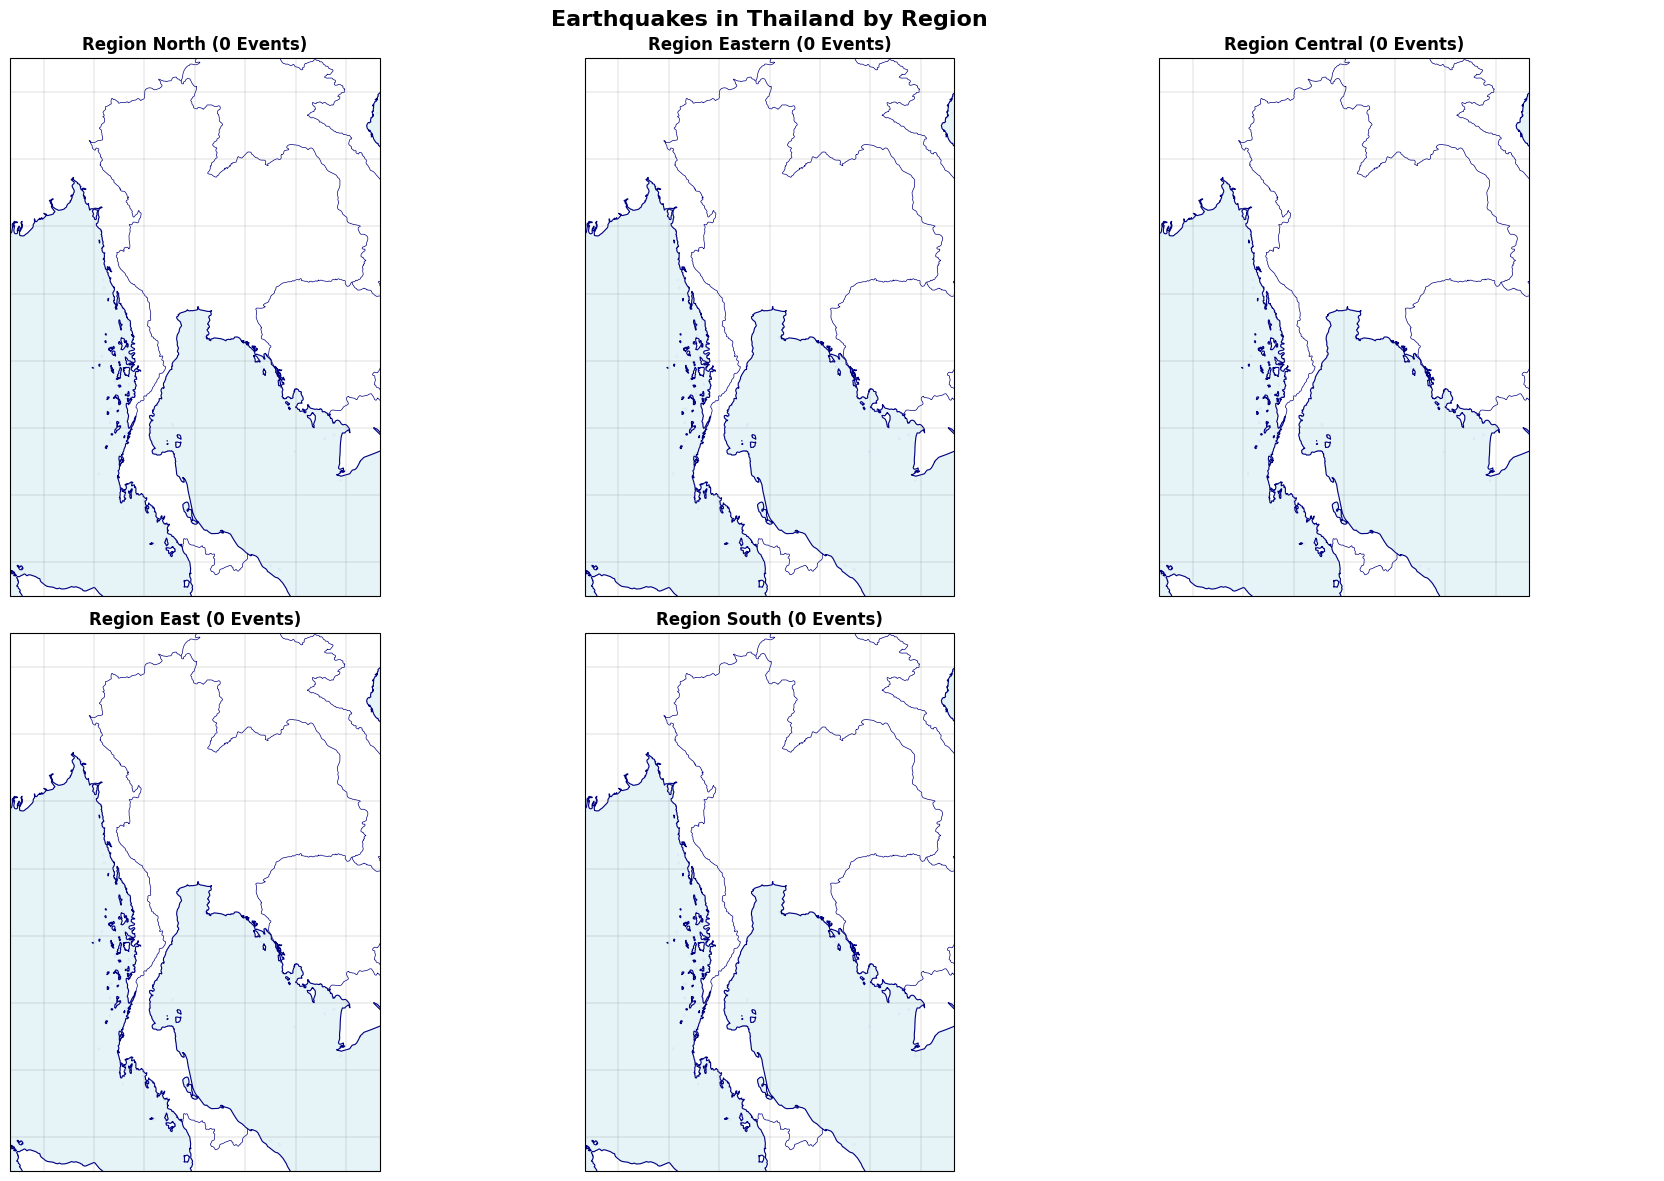

In [107]:
# Plot : By region --> Issue NO events


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import numpy as np

# -------------------------------
# 1. Load data
# -------------------------------
df = df_eq.copy()
#df = df_eq
# -------------------------------
# 2. Mapping จังหวัด → ภูมิภาค
# -------------------------------
'''
region_map = {
    "เหนือ": ["เชียงใหม่","เชียงราย","ลำพูน","ลำปาง","แพร่","น่าน","พะเยา","แม่ฮ่องสอน","ตาก","อุตรดิตถ์","พิษณุโลก","สุโขทัย","เพชรบูรณ์","กำแพงเพชร","พิจิตร"],
    "อีสาน": ["เลย","หนองคาย","บึงกาฬ","นครพนม","สกลนคร","อุดรธานี","หนองบัวลำภู","ขอนแก่น","มหาสารคาม","ร้อยเอ็ด","กาฬสินธุ์","มุกดาหาร","ยโสธร","อำนาจเจริญ","นครราชสีมา","บุรีรัมย์","สุรินทร์","ศรีสะเกษ","อุบลราชธานี","ชัยภูมิ"],
    "กลาง": ["กรุงเทพมหานคร","นนทบุรี","ปทุมธานี","สมุทรปราการ","พระนครศรีอยุธยา","สระบุรี","ลพบุรี","อ่างทอง","ชัยนาท","นครสวรรค์","สิงห์บุรี","อุทัยธานี","กาญจนบุรี","สุพรรณบุรี","ราชบุรี","สมุทรสาคร","สมุทรสงคราม","นครปฐม","เพชรบุรี","ประจวบคีรีขันธ์"],
    "ตะวันออก": ["ชลบุรี","ระยอง","จันทบุรี","ตราด","ปราจีนบุรี","สระแก้ว","นครนายก"],
    "ใต้": ["ชุมพร","ระนอง","สุราษฎร์ธานี","นครศรีธรรมราช","พังงา","ภูเก็ต","กระบี่","ตรัง","พัทลุง","สงขลา","สตูล","ปัตตานี","ยะลา","นราธิวาส"]
}

'''

region_map = {
    "North": ["เชียงใหม่","เชียงราย","ลำพูน","ลำปาง","แพร่","น่าน","พะเยา","แม่ฮ่องสอน","ตาก","อุตรดิตถ์","พิษณุโลก","สุโขทัย","เพชรบูรณ์","กำแพงเพชร","พิจิตร"],
    "Eastern": ["เลย","หนองคาย","บึงกาฬ","นครพนม","สกลนคร","อุดรธานี","หนองบัวลำภู","ขอนแก่น","มหาสารคาม","ร้อยเอ็ด","กาฬสินธุ์","มุกดาหาร","ยโสธร","อำนาจเจริญ","นครราชสีมา","บุรีรัมย์","สุรินทร์","ศรีสะเกษ","อุบลราชธานี","ชัยภูมิ"],
    "Central": ["กรุงเทพมหานคร","นนทบุรี","ปทุมธานี","สมุทรปราการ","พระนครศรีอยุธยา","สระบุรี","ลพบุรี","อ่างทอง","ชัยนาท","นครสวรรค์","สิงห์บุรี","อุทัยธานี","กาญจนบุรี","สุพรรณบุรี","ราชบุรี","สมุทรสาคร","สมุทรสงคราม","นครปฐม","เพชรบุรี","ประจวบคีรีขันธ์"],
    "East": ["ชลบุรี","ระยอง","จันทบุรี","ตราด","ปราจีนบุรี","สระแก้ว","นครนายก"],
    "South": ["ชุมพร","ระนอง","สุราษฎร์ธานี","นครศรีธรรมราช","พังงา","ภูเก็ต","กระบี่","ตรัง","พัทลุง","สงขลา","สตูล","ปัตตานี","ยะลา","นราธิวาส"]
}


# -------------------------------
# 3. Color map for magnitude
# -------------------------------
colors_map = {
    (0, 1.0):   ('white', 3),
    (1.1, 2.0): ('lightcyan', 6),
    (2.1, 3.0): ('deepskyblue', 10),
    (3.1, 4.0): ('limegreen', 15),
    (4.1, 5.0): ('gold', 22),
    (5.1, 6.0): ('darkorange', 30),
    (6.1, 7.0): ('crimson', 40),
    (7.1, 8.0): ('darkred', 55),
    (8.1, 9.0): ('indigo', 75)
}

# -------------------------------
# 4. Plot แยก 5 ภูมิภาค
# -------------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 12),
                         subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i, (region, provinces) in enumerate(region_map.items()):
    ax = axes[i]

    # filter by จังหวัดใน region นี้
    df_r = df[df["province"].isin(provinces)]
    #df_r = df[df["province"].isin(region_map)]
    lat_all = df_r["lat"].values
    lon_all = df_r["long"].values
    mag_all = df_r["mag"].values

    # set extent
    ax.set_extent([95, 106, 5, 21], crs=ccrs.PlateCarree())

    # add geo features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, color='navy')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, color='navy')
    ax.add_feature(cfeature.LAND, color='white', alpha=0.8)
    ax.add_feature(cfeature.OCEAN, color='lightblue', alpha=0.3)

    # plot scatter per magnitude range
    for (min_mag, max_mag), (color, size) in colors_map.items():
        mask_mag = (mag_all >= min_mag) & (mag_all < max_mag)
        if np.any(mask_mag):
            ax.scatter(lon_all[mask_mag], lat_all[mask_mag],
                       c=color, s=size, alpha=0.6,
                       edgecolor='black', linewidth=0.3,
                       transform=ccrs.PlateCarree())

    # gridlines
    gl = ax.gridlines(draw_labels=False, linewidth=0.3, color='gray', alpha=0.6)
    ax.set_title(f"Region {region} ({len(df_r)} Events)", fontsize=12, fontweight='bold')

# ปิด subplot ว่าง
axes[-1].axis('off')

plt.suptitle("Earthquakes in Thailand by Region", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


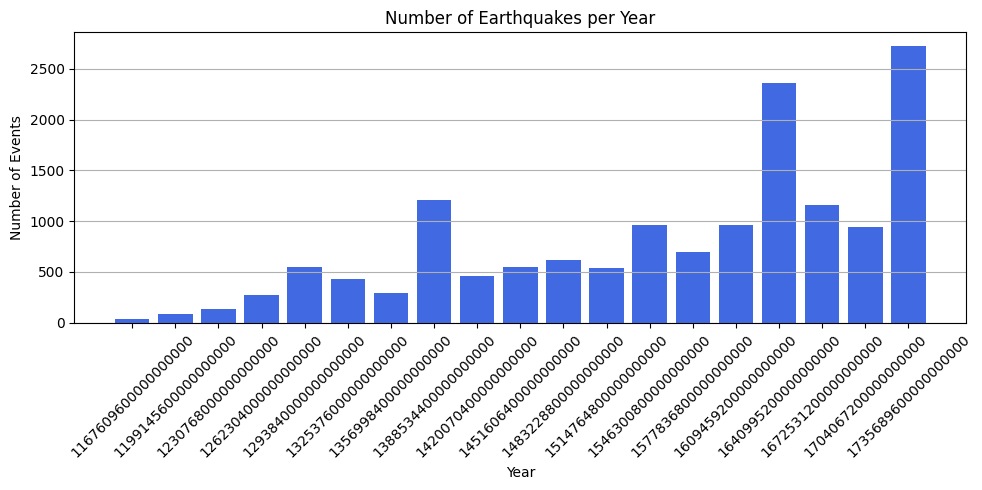

In [34]:

##Number of Earthquakes per Year "Bar Plot"


# แปลง YEAR เป็นตัวเลข แล้วกรองค่า missing
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])

# นับจำนวนเหตุการณ์ต่อปี
year_counts = df['year'].astype(int).value_counts().sort_index()

# แปลง index เป็น string เพื่อให้แกน x ไม่มี .0
years = year_counts.index.astype(str)
counts = year_counts.values

# พล็อตกราฟแท่ง
plt.figure(figsize=(10, 5))
plt.bar(years, counts, color='royalblue')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

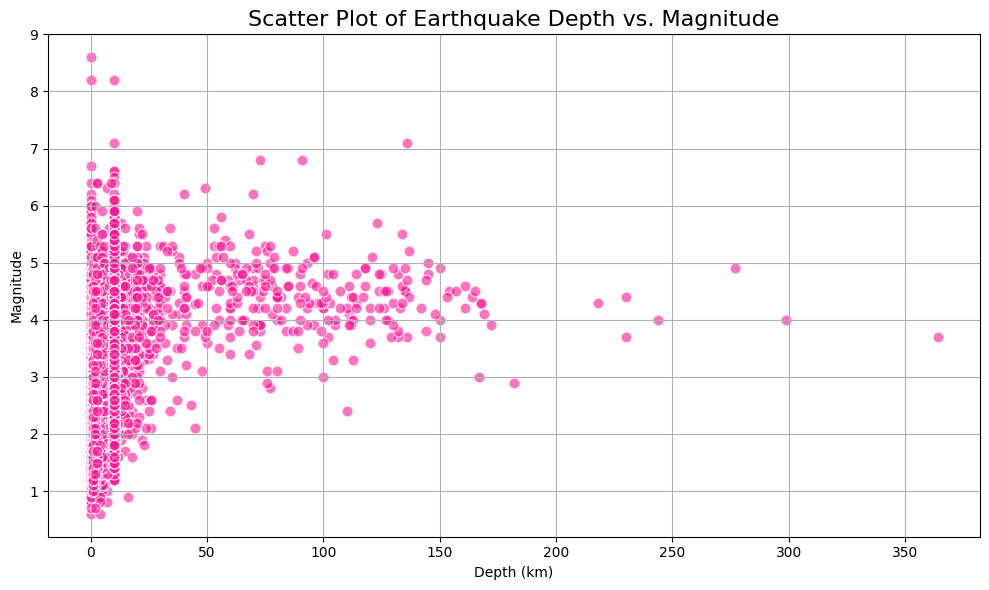

In [90]:
# กรองเฉพาะข้อมูลที่มี DEPTH และ MAG
df = df.dropna(subset=['depth', 'mag'])
df['depth'] = pd.to_numeric(df['depth'], errors='coerce')
df['mag'] = pd.to_numeric(df['mag'], errors='coerce')
df = df.dropna(subset=['depth', 'mag'])

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['depth'], df['mag'], alpha=0.6, c='deeppink', edgecolors='w', s=60)
plt.title('Scatter Plot of Earthquake Depth vs. Magnitude', fontsize=16)
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Grouping data frame

df_eq.info()

df = df_eq
df[['mag','province']]

df['mag'].isna().count()   # This equals df['type2'].isnull()
df.count()
df['region']

# Prepare a groupby object to play around
grouped_country = df[['date','year','time','lat','long','mag','MAG_RANGE','depth','phase','subdistrict','district','province','country','region']].groupby('country')

# Focus : Max of Magnitude by country
grouped_country[['mag','country','date']].agg('max')
grouped_country[['mag','country','date']].agg('count')

result = df.groupby('country', as_index=False).agg({'mag': 'max', 'date': 'max'})
result = result.sort_values('date', ascending=False)
result


# ===============================================
# Need Plot ...
# ===============================================



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   no               14986 non-null  int64         
 1   refid            14986 non-null  object        
 2   dtutc            14986 non-null  object        
 3   date             14986 non-null  datetime64[ns]
 4   year             14986 non-null  datetime64[ns]
 5   month            14986 non-null  int64         
 6   day              14986 non-null  int64         
 7   time             14986 non-null  object        
 8   lat              14986 non-null  float64       
 9   long             14986 non-null  float64       
 10  mag              14986 non-null  float64       
 11  MAG_RANGE        14986 non-null  object        
 12  MAG_RANGE_DES    14986 non-null  object        
 13  depth            14986 non-null  float64       
 14  phase            14986 non-null  int64

country   mag       date
9                                     Myanmar  8.20 2025-08-30
17                                   Thailand  6.30 2025-08-30
4                                   Indonesia  8.60 2025-08-23
3                                       India  6.60 2025-08-11
11                              Myanmar-China  6.00 2025-08-08
5                                         Lao  6.40 2025-08-01
2                                       China  6.00 2025-07-28
22                                    Vietnam  5.30 2025-07-12
12                              Myanmar-India  7.10 2025-05-28
6                                   Lao-China  4.80 2025-05-13
21          Thailand-กัมพูชา-Vietnam-Malaysia  3.60 2025-03-14
10          Myanmar-Bangladesh-India-Thailand  4.80 2024-11-03
1                                  Bangladesh  5.00 2023-06-16
19  Thailand-Myanmar-India-Indonesia-Malaysia  4.30 2022-02-07
13                                Myanmar-Lao  5.28 2022-01-01
7                                 Lao-Vietnam  5.10 2016-04-23
15                           Myanmar-Thailand  4.60 2015-01-07
18                               Thailand-Lao  3.90 2014-12-22
8                                    Malaysia  4.00 2013-08-20
20  Thailand-Myanmar-India-รndonesia-Malaysia  2.50 2012-09-19
16                       Myanmar-Thailand-Lao  2.95 2011-03-27
0                                           -  2.92 2011-03-26
14                          Myanmar-Lao-China  5.70 2007-11-02

In [16]:
result

country   mag       date
9                                     Myanmar  8.20 2025-08-30
17                                   Thailand  6.30 2025-08-30
4                                   Indonesia  8.60 2025-08-23
3                                       India  6.60 2025-08-11
11                              Myanmar-China  6.00 2025-08-08
5                                         Lao  6.40 2025-08-01
2                                       China  6.00 2025-07-28
22                                    Vietnam  5.30 2025-07-12
12                              Myanmar-India  7.10 2025-05-28
6                                   Lao-China  4.80 2025-05-13
21          Thailand-กัมพูชา-Vietnam-Malaysia  3.60 2025-03-14
10          Myanmar-Bangladesh-India-Thailand  4.80 2024-11-03
1                                  Bangladesh  5.00 2023-06-16
19  Thailand-Myanmar-India-Indonesia-Malaysia  4.30 2022-02-07
13                                Myanmar-Lao  5.28 2022-01-01
7                                 Lao-Vietnam  5.10 2016-04-23
15                           Myanmar-Thailand  4.60 2015-01-07
18                               Thailand-Lao  3.90 2014-12-22
8                                    Malaysia  4.00 2013-08-20
20  Thailand-Myanmar-India-รndonesia-Malaysia  2.50 2012-09-19
16                       Myanmar-Thailand-Lao  2.95 2011-03-27
0                                           -  2.92 2011-03-26
14                          Myanmar-Lao-China  5.70 2007-11-02

In [19]:
df_eq['mag']

0        0
1        0
2        0
3        0
4        0
        ..
14981    0
14982    0
14983    0
14984    0
14985    0
Name: mag, Length: 14986, dtype: int64

In [17]:

df2 = df_eq
# สร้างคอลัมน์ boolean ตามเงื่อนไข
df2['mag_gt_0'] = df2['mag'] = 0
df2['mag_ge_5'] = df2['mag'] >= 5

# Group ตามที่ต้องการ เช่น THAI_REGION
counts = df2.groupby('region').agg(
    count_mag_gt_0=('mag_gt_0', 'sum'),
    count_mag_ge_5=('mag_ge_5', 'sum')
).reset_index()

# Group ตามที่ต้องการ เช่น PROVINCE
counts_province = df2.groupby('province').agg(
    count_mag_gt_0=('mag_gt_0', 'count'),
    count_mag_ge_5=('mag_ge_5', 'count')
).reset_index()

df2 = df2.merge(counts, on='region', how='left')
#df2.tail(5)

counts_province
df2[['mag','province','mag_gt_0']]

mag    province  mag_gt_0
0        0  Chiang Mai         0
1        0  Chiang Mai         0
2        0  Chiang Rai         0
3        0  Chiang Mai         0
4        0         NaN         0
...    ...         ...       ...
14981    0         NaN         0
14982    0         NaN         0
14983    0     Lampang         0
14984    0         NaN         0
14985    0         NaN         0

[14986 rows x 3 columns]

In [18]:
df2['mag_gt_0']
df2[['mag','PROVINCE','mag_gt_0']]
df2[['mag','PROVINCE','mag_ge_5']]

# Prepare a groupby object to play around
grouped_province = df[['date','YEAR','time','lat','long','mag','MAG_RANGE','depth','phase','SUB_DISTRICT','DISTRICT','PROVINCE','COUNTRY','THAI_REGION']].groupby('PROVINCE')

# Focus : Max of Magnitude by province
grouped_province[['mag','PROVINCE','date']].agg('max')
grouped_province[['mag','PROVINCE','date']].agg('count')

result = df2.groupby('PROVINCE', as_index=False).agg({'mag': 'max', 'date': 'max'})
result = result.sort_values('date', ascending=False)
result

KeyError: "['PROVINCE'] not in index"

In [ ]:
# normalize column names
df = df_eq
df.columns = [str(c).strip() for c in df.columns]

# detect key columns
country_col = next((c for c in df.columns if any(k in c.lower() for k in ['country','ประเทศ','land'])), None)
prov_col = next((c for c in df.columns if any(k in c.lower() for k in ['prov','province','จังหวัด','amphur','sub_district','district'])), None)
mag_col = next((c for c in df.columns if 'mag' in c.lower()), None)
year_col = next((c for c in df.columns if c.lower()=='year'), None)
date_col = next((c for c in df.columns if 'date' in c.lower() and 'thai' not in c.lower()), None)

# normalize and cast
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
if mag_col:
    df[mag_col] = pd.to_numeric(df[mag_col], errors='coerce')
if prov_col:
    df[prov_col] = df[prov_col].astype(str).str.strip()
if country_col:
    df[country_col] = df[country_col].astype(str).str.strip()

# map Thai country names to English (if present)
country_map = {'ไทย':'Thailand','พม่า':'Myanmar','เมียนมา':'Myanmar','ลาว':'Laos',
               'กัมพูชา':'Cambodia','มาเลเซีย':'Malaysia','เวียดนาม':'Vietnam'}

if country_col:
    df['country_norm'] = df[country_col].map(country_map).fillna(df[country_col])

# filter Thailand
if 'country_norm' in df.columns:
    th_df = df[df['country_norm']=='Thailand'].copy()
else:
    th_df = df.copy()

In [ ]:
df_grouped_country = df2.groupby('COUNTRY', as_index=False).agg({'mag': 'max', 'date': 'max'})
df_grouped_country

In [ ]:
import pandas as pd

# โหลดไฟล์ข้อมูล
df = pd.read_csv('all event .xlsx - แผ่นดินไหวในประเทศและไกล้เคียง.csv', encoding='utf-8')

# ปรับปรุงคอลัมน์ 'DATE THAI' ให้อยู่ในรูปแบบวันที่
df['DATE THAI'] = pd.to_datetime(df['DATE THAI'])

# 1. แผ่นดินไหวเกิดขึ้นบ่อยที่สุดในช่วงเดือนหรือฤดูกาลใด?
df['month'] = df['DATE THAI'].dt.month
monthly_counts = df['month'].value_counts().sort_index()

print('----------------------------------------------------')
print('1. จำนวนแผ่นดินไหวในแต่ละเดือน:')
print(monthly_counts)
print('เดือนที่เกิดแผ่นดินไหวบ่อยที่สุด:', monthly_counts.idxmax())

# 2. มีแนวโน้มการเพิ่มขึ้นหรือลดลงของจำนวนแผ่นดินไหวในช่วง 10-20 ปีที่ผ่านมาหรือไม่?
df['year'] = df['DATE THAI'].dt.year
yearly_counts = df['year'].value_counts().sort_index()

print('\n----------------------------------------------------')
print('2. จำนวนแผ่นดินไหวในแต่ละปี:')
print(yearly_counts)

# 3. จังหวัดหรือภูมิภาคใดของไทยที่มีแผ่นดินไหวเกิดขึ้นบ่อยที่สุด?
top_regions = df['REGION.'].value_counts().head(10)

print('\n----------------------------------------------------')
print('3. 10 อันดับ จังหวัด/ภูมิภาค ที่เกิดแผ่นดินไหวบ่อยที่สุด:')
print(top_regions)

# 4. ค่าขนาดแผ่นดินไหว (Magnitude) เฉลี่ยในแต่ละภูมิภาคเป็นอย่างไร?
region_avg_magnitude = df.groupby('REGION.')['MAG.'].mean().sort_values(ascending=False).head(10)

print('\n----------------------------------------------------')
print('4. ค่าเฉลี่ย Magnitude ในแต่ละภูมิภาค (10 อันดับแรก):')
print(region_avg_magnitude)

print('----------------------------------------------------')

In [ ]:
df_eq.columns
df_eq[['region','mag']]
df_eq['mag']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Add font for Thai characters
# For example, using 'TH SarabunPSK' or 'Tahoma'.
# You might need to install the font in Colab if not available by default.
# Example for installing a font (run this in a separate cell if needed):
# !wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# fm.fontManager.addfont('thsarabunnew-webfont.ttf')
# plt.rcParams['font.family'] = 'TH SarabunPSK' # or 'Tahoma'

# Set a default font that supports Thai characters
#try:
#    plt.rcParams['font.family'] = 'DejaVu Sans' # Try a common font first
#except:
#    pass # Keep the default if font is not available

df = df_eq
print(df.columns)
df.info()
df[['date','year','mag','lat','long']]
# แปลง date เป็น datetime หากยังไม่ได้แปลง
#df['date'] = pd.to_datetime(df=['date'])
df['date']

# สร้างกราฟแบบ group โดย THAI_REGION
fig, ax = plt.subplots(figsize=(12,6))
for region, data in df.groupby('region'):
    # Filter out None/NaN region values for plotting
    if pd.notna(region):
        ax.plot(data['year'], data['mag'], marker='o', label=region, linestyle='-')

ax.set_xlabel('Date')
ax.set_ylabel('Magnitude')
ax.set_title('Magnitude by THAI_REGION vs Date')
ax.legend(title='THAI_REGION')
plt.tight_layout()
plt.show()

In [ ]:
#Unable to access the excel files in Github
import pandas as pd
import requests
from io import BytesIO


url = "https://github.com/siriwatsc-debug/ProjectDADS5001/"
r = requests.get(url)

file_name = "DATA_Earthquake_Draft1.xlsx"
with open(file_name, "wb") as f:
    f.write(r.content)

df = pd.read_excel(file_name, engine="openpyxl")

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

display(
    df.style
      .format({col: "{:.2f}" for col in numeric_cols})
)

In [ ]:
#Equak Data : Lat,Long,Mag,Dep,Phase, Date, Time, Area (District,Province, Country)

# Original data
df_eq.info()

# Rename existing columns ID
df2 = df_eq.rename(columns={'No.':'no', 'REF. ID':'refid', 'DATE-TIME UTC':'dtutc','DATE THAI':'date','TIME THAI':'time', 'LAT.':'lat', 'LONG.':'long','MAG.':'mag', 'DEPTH.':'depth', 'PHASE.':'phase', 'REGION.':'region','REGION..1':'region1', 'DETAIL':'detail' }) # default: inplace=False
df2.info()




In [ ]:
#Plot Mag vs Year

df = df2
plt.figure(figsize=(15,5), dpi=150) # default
#ax = fig.gca()

#ax.plot(df['YEAR'], df['mag'])
plt.plot(df['YEAR'], df['mag'])
plt.show()
'''

plt.scatter(df['YEAR'], df['mag'], s=group['YEAR'],   # ขนาดวงกลมขึ้นกับ magnitude
                color=colors[ttype], alpha=0.1)


plt.scatter(group['YEAR'], group['MAG.'],
                s=group['MAG.'],   # ขนาดวงกลมขึ้นกับ magnitude
                color=colors[ttype], alpha=0.6, label=ttype)



plt.show()      '''


In [ ]:
df

In [ ]:
df = df_eq
df['YEAR']
df['type']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1) โหลดไฟล์ Excel ===
#file_path = "/content/all event .xlsx"   # เปลี่ยน path ตามที่ mount ไฟล์ไว้
#df = pd.read_excel(file_path)
df = df_eq
# ตรวจสอบข้อมูลเบื้องต้น
print(df.head())

# === 2) แปลงเวลา ===
df['TIME THAI'] = pd.to_datetime(df['TIME THAI'])

# === 3) หา mainshock (ค่า magnitude สูงสุด) ===
mainshock_idx = df['MAG.'].idxmax()
mainshock_time = df.loc[mainshock_idx, 'TIME THAI']

# === 4) สร้าง column ประเภทแผ่นดินไหว ===
df['type'] = "aftershock"
df.loc[df['TIME THAI'] < mainshock_time, 'type'] = "foreshock"
df.loc[df['TIME THAI'] == mainshock_time, 'type'] = "mainshock"

# === 5) วาดกราฟ bubble chart ===
plt.figure(figsize=(14,6))
colors = {"foreshock":"red", "mainshock":"black", "aftershock":"gray"}

for ttype, group in df.groupby("type"):
    plt.scatter(group['TIME THAI'], group['MAG.'],
                s=group['MAG.']**3,   # ขนาดวงกลมขึ้นกับ magnitude
                color=colors[ttype], alpha=0.6, label=ttype)

# เส้นตั้งแสดง mainshock
plt.axvline(mainshock_time, color="black", linestyle="--", label="Mainshock Time")

plt.xlabel("Date")
plt.ylabel("Magnitude (Mw)")
plt.title("Foreshock - Mainshock - Aftershock Timeline")
plt.legend()
plt.show()


In [ ]:
# Example : Scatter plot with size

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
# Subject : DADS5001 - Tools and Programing
# Project : Pandas/Numpy
# Topic : Study the factors to occur the eartquake

import pandas as pd
import numpy as np

# load data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/all-event.xlsx')

df.head()
#df.describe()
df.shape
df.info()

In [ ]:
# Rename existing columns
df2 = df.rename(columns={'No.':'no', 'REF. ID':'refid', 'DATE-TIME UTC':'dtutc','DATE THAI':'date','TIME THAI':'time', 'LAT.':'lat', 'LONG.':'long','MAG.':'mag', 'DEPTH.':'depth', 'PHASE.':'phase', 'REGION.':'region','REGION..1':'region1', 'DETAIL':'detail' }) # default: inplace=False
df = df2
df2.info()

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

# โหลดข้อมูล
#file_path = "/mnt/data/all event .xlsx"
#df = pd.read_excel(file_path)

# แปลงคอลัมน์เวลา
df['time'] = pd.to_datetime(df['time'])
df['Month'] = df['time'].dt.to_period("M")

# เตรียม lat/lon grid
lons = df['long'].values
lats = df['lat'].values
lon_lin = np.linspace(min(lons), max(lons), 150)
lat_lin = np.linspace(min(lats), max(lats), 150)
lon_grid, lat_grid = np.meshgrid(lon_lin, lat_lin)

# เตรียมข้อมูลสำหรับแต่ละเดือน
frames = []
for month, group in df.groupby('Month'):
    if len(group) < 3:
        continue
    mags = group['mag'].values
    lons = group['long'].values
    lats = group['lat'].values

    # interpolate magnitude
    mag_grid = griddata((lons, lats), mags, (lon_grid, lat_grid), method='cubic')

    frames.append(go.Frame(
        data=[
            go.Heatmap(
                x=lon_lin, y=lat_lin, z=mag_grid,
                colorscale="RdYlBu_r", zmin=df['mag'].min(), zmax=df['mag'].max(),
                colorbar=dict(title="Magnitude")
            ),
            go.Scatter(
                x=lons, y=lats, mode="markers",
                marker=dict(size=mags*3, color=mags, colorscale="RdYlBu_r", line=dict(color="black", width=1)),
                name="Earthquakes"
            )
        ],
        name=str(month)
    ))

# กราฟเริ่มต้น (frame แรก)
fig = go.Figure(
    data=frames[0].data,
    layout=go.Layout(
        title="Earthquake Magnitude Heatmap (Monthly)",
        xaxis=dict(title="Longitude"),
        yaxis=dict(title="Latitude"),
        updatemenus=[{
            "type": "buttons",
            "buttons": [
                {"label": "Play", "method": "animate", "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}]},
                {"label": "Pause", "method": "animate", "args": [[None], {"frame": {"duration": 0}, "mode": "immediate"}]}
            ]
        }]
    ),
    frames=frames
)

# เพิ่ม Slider
fig.update_layout(
    sliders=[{
        "steps": [
            {"args": [[f.name], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate"}],
             "label": f.name, "method": "animate"}
            for f in frames
        ],
        "transition": {"duration": 300},
        "x": 0.1, "y": -0.1,
        "len": 0.9
    }]
)

fig.show()


In [ ]:
# Animation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
from matplotlib.animation import FuncAnimation

# โหลดไฟล์ข้อมูล
#file_path = "/mnt/data/all event .xlsx"
#df = pd.read_excel(file_path)

# ตรวจสอบว่ามีคอลัมน์ Time หรือ DateTime
df['time'] = pd.to_datetime(df['time'])

# เรียงข้อมูลตามเวลา
df = df.sort_values('time')

# สร้างกรอบเวลา (เช่น รายวัน)
time_groups = df.groupby(df['time'].dt.date)

# เตรียม grid lat/lon
lons = df['long'].values
lats = df['lat'].values
lon_lin = np.linspace(min(lons), max(lons), 200)
lat_lin = np.linspace(min(lats), max(lats), 200)
lon_grid, lat_grid = np.meshgrid(lon_lin, lat_lin)

# ตั้งค่า plot
fig = plt.figure(figsize=(8,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_title("Earthquake Magnitude Heatmap", fontsize=14)

# initial plot
contour = None
sc = None

def update(frame):
    global contour, sc
    if contour:  # ลบ contour เก่า
        for coll in contour.collections:
            coll.remove()
    if sc:
        sc.remove()

    date, group = frame
    lons = group['Longitude'].values
    lats = group['Latitude'].values
    mags = group['Magnitude'].values

    if len(group) < 3:
        return

    # interpolate magnitude
    mag_grid = griddata((lons, lats), mags, (lon_grid, lat_grid), method='cubic')

    # plot contour
    contour = ax.contourf(lon_grid, lat_grid, mag_grid, levels=20, cmap="RdYlBu_r", alpha=0.7,
                          transform=ccrs.PlateCarree())
    sc = ax.scatter(lons, lats, c=mags, cmap="RdYlBu_r", edgecolor="k", s=mags*10,
                    transform=ccrs.PlateCarree())
    ax.set_title(f"Earthquake Magnitude Heatmap\nDate: {date}", fontsize=14)

    return contour, sc

# สร้าง animation
ani = FuncAnimation(fig, update, frames=time_groups, repeat=False)

# บันทึกเป็นไฟล์ (เลือกอย่างใดอย่างหนึ่ง)
# ani.save("earthquake_heatmap.gif", writer="imagemagick", fps=2)
# ani.save("earthquake_heatmap.mp4", writer="ffmpeg", fps=2)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# โหลดไฟล์
#file_path = "/mnt/data/all event .xlsx"
#f = pd.read_excel(file_path)

# สมมติว่ามีคอลัมน์ Latitude, Longitude, Magnitude
lats = df['lat'].values
lons = df['long'].values
mags = df['mag'].values

# สร้าง grid (lat, lon)
lon_lin = np.linspace(min(lons), max(lons), 200)
lat_lin = np.linspace(min(lats), max(lats), 200)
lon_grid, lat_grid = np.meshgrid(lon_lin, lat_lin)

# Interpolate magnitude บน grid
mag_grid = griddata((lons, lats), mags, (lon_grid, lat_grid), method='cubic')

# เริ่ม plot แผนที่
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# ใส่แผนที่พื้นหลัง
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# ระบายสี magnitude เป็น contour
contour = ax.contourf(lon_grid, lat_grid, mag_grid,
                      levels=20, cmap="RdYlBu_r", alpha=0.7,
                      transform=ccrs.PlateCarree())

# plot จุดจริงของแผ่นดินไหว
sc = ax.scatter(lons, lats, c=mags, cmap="RdYlBu_r", edgecolor="k",
                s=mags*10, transform=ccrs.PlateCarree())

# colorbar
cbar = plt.colorbar(contour, ax=ax, shrink=0.6, pad=0.05)
cbar.set_label("Magnitude")

ax.set_title("Earthquake Magnitude Heatmap", fontsize=14)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล
#file_path = "/mnt/data/all event .xlsx"
#df = pd.read_excel(file_path)

# แปลงเวลาเป็น datetime
df["date"] = pd.to_datetime(df["date"])

# --- เตรียม bin สำหรับ magnitude ---
bins = [0,2,4,6,8]
df["Mag_bin"] = pd.cut(df["mag"], bins)

# สร้าง figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ===== 1. Time vs Magnitude =====
axes[0,0].scatter(df["date"], df["mag"], alpha=0.7, c="blue")
axes[0,0].set_title("Time vs Magnitude")
axes[0,0].set_xlabel("Time")
axes[0,0].set_ylabel("Magnitude")

# ===== 2. Magnitude vs Region =====
sns.boxplot(x="region", y="mag", data=df, ax=axes[0,1])
axes[0,1].set_title("Magnitude Distribution by Region")
axes[0,1].tick_params(axis="x", rotation=45)

# ===== 3. Time vs Depth (colored by Phase) =====
sc = axes[1,0].scatter(df["time"], df["depth"], c=df["phase"],
                       cmap="viridis", alpha=0.7)
axes[1,0].set_title("Time vs Depth (colored by Phase)")
axes[1,0].set_xlabel("Time")
axes[1,0].set_ylabel("Depth (km)")
cbar = fig.colorbar(sc, ax=axes[1,0])
cbar.set_label("Phase")

'''
# ===== 4. Frequency of Magnitude Range by Region =====
sns.countplot(x="Mag_bin", hue="region", data=df, ax=axes[1,1])
axes[1,1].set_title("Frequency of Magnitude Range by Region")
axes[1,1].set_xlabel("Magnitude Range")
axes[1,1].set_ylabel("Count")
'''

plt.tight_layout()
plt.show()


In [ ]:
# Create DataFrame from a list of lists
# Use default indexing for both row and column
#df = pd.DataFrame( [ row0, row1, row2, row3, row4 ] )

# Inspect the data
print( f"type = {type(df)}" )
print( f"shape = {df.shape}" )
print( f"row index = {df.index}")
print( f"column index = {df.columns}" )
print( f"\ndtypes:\n{df.dtypes}\n" )


df.shape()
#df.head
#df.iloc(3,7)

In [ ]:
print(df.columns)
df

In [ ]:
# use actual data
'''
import pandas as pd
import matplotlib.pyplot as plt
'''

# โหลดข้อมูลจากไฟล์ Excel
#file_path = "/mnt/data/all event .xlsx"
#df = pd.read_excel(file_path)

# ตรวจสอบชื่อคอลัมน์
print(df.columns)

# สมมติว่ามี column: Time, Magnitude, Depth
# ถ้า Time เป็น string ต้องแปลงเป็น datetime
df["Time"] = pd.to_datetime(df["DATE THAI"])

# เรียงตามเวลา (กันพลาด)
df = df.sort_values("Time")

# เริ่ม plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Magnitude (แกนซ้าย)
ax1.plot(df["Time"], df["MAG."], color="tab:blue", marker="o", label="Magnitude")
ax1.set_xlabel("Time")
ax1.set_ylabel("Magnitude", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# สร้างแกนขวาสำหรับ Depth
ax2 = ax1.twinx()
ax2.plot(df["Time"], df["DEPTH."], color="tab:red", marker="x", label="Depth")
ax2.set_ylabel("Depth (km)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# รวม legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title("Earthquake Magnitude and Depth over Time")
plt.show()


In [ ]:
# install package for map
!pip install cartopy folium


In [ ]:
print(df.columns)

In [ ]:
# Plot Depth and Phaseuse actual data

df = df_eq
# ตรวจสอบชื่อ column
print(df.columns)

# สมมติว่ามีคอลัมน์: Latitude, Longitude, Magnitude, Depth, Phase
lat = df["lat"]
lon = df["long"]
mag = df["mag"]
depth = df["depth"]
phase = df["phase"]



# กำหนดพื้นที่แผนที่ (ประเทศไทยและรอบๆ)
extent = [90, 110, 5, 25]

# --- Plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6),
                         subplot_kw={'projection': ccrs.PlateCarree()})
'''
sc = ax.scatter(
    lon, lat,
    c=mag, s=mag**2,   # ขนาดจุด ∝ magnitude
    cmap="jet", alpha=0.8,
    vmin=0, vmax=9.0,
    edgecolor="k", transform=ccrs.PlateCarree()
)
'''
# ===== แผนที่ Magnitude =====
axes[0].add_feature(cfeature.COASTLINE)
axes[0].add_feature(cfeature.BORDERS, linestyle=":")
axes[0].set_extent(extent)
sc1 = axes[0].scatter(lon, lat, c=mag, s=mag**3,
                      cmap="jet", alpha=0.7, edgecolor="k",transform=ccrs.PlateCarree())
plt.colorbar(sc1, ax=axes[0], orientation="vertical", label="Magnitude")
axes[0].set_title("Earthquake Magnitude")

# ===== แผนที่ Depth =====
axes[1].add_feature(cfeature.COASTLINE)
axes[1].add_feature(cfeature.BORDERS, linestyle=":")
axes[1].set_extent(extent)
sc2 = axes[1].scatter(lon, lat, c=depth, s=50,
                      cmap="viridis", alpha=0.7, edgecolor="k")
plt.colorbar(sc2, ax=axes[1], orientation="vertical", label="Depth (km)")
axes[1].set_title("Earthquake Depth")

# ===== แผนที่ Phase =====
axes[2].add_feature(cfeature.COASTLINE)
axes[2].add_feature(cfeature.BORDERS, linestyle=":")
axes[2].set_extent(extent)
sc3 = axes[2].scatter(lon, lat, c=phase, s=50,
                      cmap="plasma", alpha=0.7, edgecolor="k")
plt.colorbar(sc3, ax=axes[2], orientation="vertical", label="Phase")
axes[2].set_title("Earthquake Phase")

plt.tight_layout()
plt.show()
df_eq[['mag','depth','phase','YEAR']]
max(df_eq['mag'])

In [ ]:
# example : Plot Depth and Phase vs Time series


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# สร้างข้อมูลตัวอย่าง
np.random.seed(0)
time = pd.date_range(start="2025-01-01", periods=100, freq="D")
depth = np.random.uniform(10, 50, size=100)   # แกน Y1
phase = np.sin(np.linspace(0, 20, 100))       # แกน Y2

# เริ่ม plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Depth (Y1)
ax1.plot(time, depth, color="tab:blue", label="Depth")
ax1.set_xlabel("Time")
ax1.set_ylabel("Depth", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# สร้างแกนที่สอง (Y2) สำหรับ Phase
ax2 = ax1.twinx()
ax2.plot(time, phase, color="tab:red", label="Phase")
ax2.set_ylabel("Phase", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# เพิ่ม legend จากทั้งสองแกน
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.title("Time Series with Depth (Y1) and Phase (Y2)")
plt.show()


In [ ]:
# Install a Thai font
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib.font_manager as fm
fm.fontManager.addfont('thsarabunnew-webfont.ttf')
plt.rcParams['font.family'] = 'Tahoma'

In [ ]:
# Re-run the plotting code with the updated font settings
# แปลง date เป็น datetime หากยังไม่ได้แปลง
df2['date'] = pd.to_datetime(df2['date'])

# สร้างกราฟแบบ group โดย THAI_REGION
fig, ax = plt.subplots(figsize=(12,6))
for region, data in df2.groupby('THAI_REGION'):
    # Filter out None/NaN region values for plotting
    if pd.notna(region):
        ax.plot(data['date'], data['mag'], marker='o', label=region, linestyle='-')

ax.set_xlabel('Date')
ax.set_ylabel('Magnitude')
ax.set_title('Magnitude by THAI_REGION vs Date')
ax.legend(title='THAI_REGION')
plt.tight_layout()
plt.show()